In [19]:
# Install necessary libraries
%pip install scikit-learn
%pip install nltk

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
# Loading Dataset

data = pd.read_csv('IMDB Dataset.csv')

In [22]:
# basic information about the dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11983 entries, 0 to 11982
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     11983 non-null  object
 1   sentiment  11983 non-null  object
dtypes: object(2)
memory usage: 187.4+ KB
None
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [23]:
#Text Preprocessing using NLP techniques
text_data = data['review']

In [24]:
# text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [25]:
# Applying preprocessing to the text data

data['processed_text'] = text_data.apply(preprocess_text) 

In [26]:
#  Feature Engineering

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['processed_text'])

In [27]:
# K-Means Clustering

# Finding the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

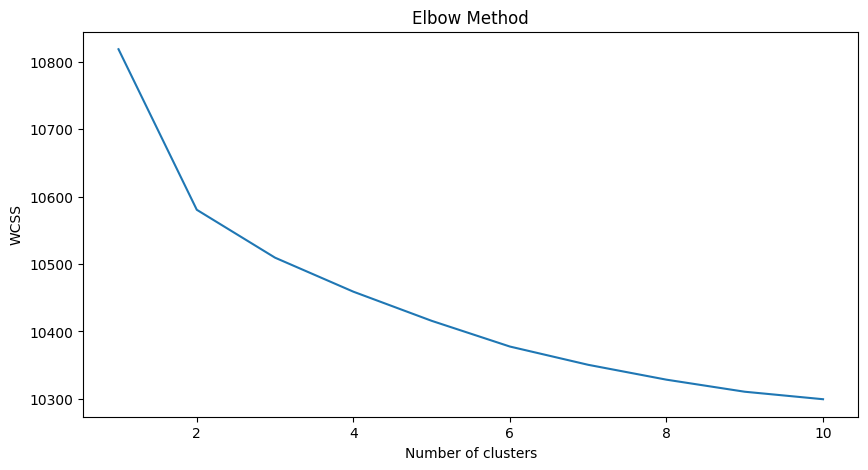

In [28]:
# Ploting elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
# Based on the elbow graph, asuuming optimal number of clusters as k
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)
data['cluster'] = kmeans.labels_

In [30]:
# Sentiment Analysis Model Building

# Assuming the 'sentiment' column contains the labels (positive/negative)
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['processed_text'], data['sentiment'], test_size=0.2, random_state=0)

In [32]:
# Vectorize the text data for sentiment analysis
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [33]:
# Train the model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [34]:
# Predict and evaluate the model
y_pred = model.predict(X_test_vec)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8610763454317898
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1260
           1       0.83      0.88      0.86      1137

    accuracy                           0.86      2397
   macro avg       0.86      0.86      0.86      2397
weighted avg       0.86      0.86      0.86      2397



In [39]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Perform the groupby operation on the numeric data
cluster_summary = numeric_data.groupby(data['cluster']).mean()
print(cluster_summary)


         sentiment  cluster
cluster                    
0         0.400511      0.0
1         0.481735      1.0
2         0.548525      2.0
3         0.543577      3.0


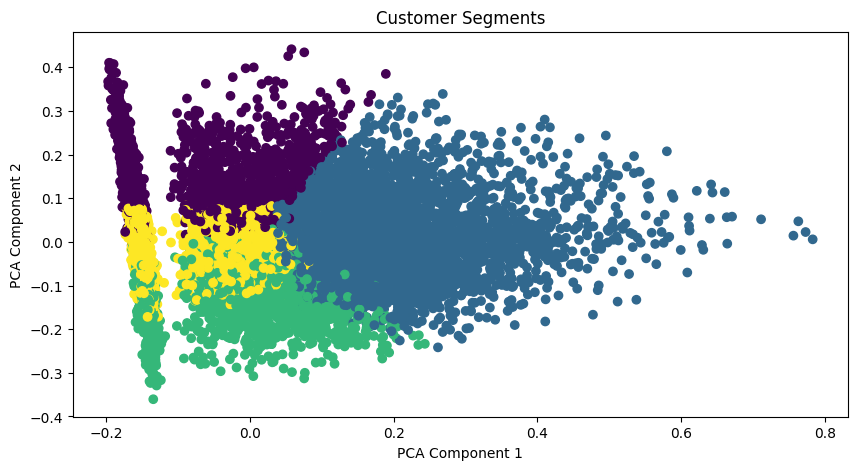

In [41]:
# Visualizing clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X.toarray())
plt.figure(figsize=(10, 5))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=data['cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [42]:
# Summarize the sentiment analysis results
print('Sentiment analysis model performance:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save the processed data
data.to_csv('processed_data.csv', index=False)

Sentiment analysis model performance:
Accuracy: 0.8610763454317898
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1260
           1       0.83      0.88      0.86      1137

    accuracy                           0.86      2397
   macro avg       0.86      0.86      0.86      2397
weighted avg       0.86      0.86      0.86      2397

